In [1]:
import os
import pandas as pd
import cv2
from skimage.feature import hog

In [2]:
path="C:\\Users\\Admin\\Downloads\\IP-dataset\\DataSet\\all_dataset_new_compressed"
#path2="C:/Users/Admin/Downloads/IP-dataset/Annotated_dataset/demo"

In [3]:
names=[]
label=[]
data=[]
c=0
hog_fd=[]
hist_features=[]
for folder in os.listdir(path):
    if folder == 'bees':
        for file in os.listdir(os.path.join(path,folder)):
            if(file!='desktop.ini'):
                names.append(file)
                label.append(1)
                img=cv2.imread(os.path.join(os.path.join(path,folder),file))
                #img=cv2.resize(img,(64,64))
                fd= hog(img,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),multichannel=True)
                hog_fd.append(fd)
                hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                hist = cv2.calcHist([hsv], [0, 1, 2], None, [8,8,8],
                    [0, 180, 0, 256, 0, 256])
                hist = cv2.normalize(hist,hist)
                # return the flattened histogram as the feature vector
                td_hist = hist.flatten()
                hist_features.append(td_hist)
                img=img.flatten()
                data.append(img)
                c=c+1
                
    if folder =='non_bees':
        for file in os.listdir(os.path.join(path,folder)):
            if(file!='desktop.ini'):
                names.append(file)
                label.append(0)
                img=cv2.imread(os.path.join(os.path.join(path,folder),file))
                #img=cv2.resize(img,(64,64))
                fd= hog(img,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),multichannel=True)
                hog_fd.append(fd)
                hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                hist = cv2.calcHist([hsv], [0, 1, 2], None, [8,8,8],
                    [0, 180, 0, 256, 0, 256])
                hist = cv2.normalize(hist,hist)
                # return the flattened histogram as the feature vector
                td_hist = hist.flatten()
                hist_features.append(td_hist)
                img=img.flatten()
                data.append(img)
                c=c+1
        
print("count",c)

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


count 8849


In [4]:
import numpy as np
images_np=np.array(data)
hog_np=np.array(hog_fd)
data_hog=np.concatenate((images_np,hog_np),axis=1)
data_hog_hist=np.concatenate((data_hog,hist_features),axis=1)

In [5]:
dfname=pd.DataFrame(names)
dflabel=pd.DataFrame(label)

In [6]:
import numpy as np
len(names)

8849

In [7]:
len(os.listdir(path))

2

In [8]:
dfname.columns=['id']
dflabel.columns=['label']

In [9]:
df_concat = pd.concat([dfname, dflabel], axis=1)

In [10]:
df_concat.to_csv("C:/Users/Admin/Downloads/IP-dataset/Annotated_dataset/demo/labels.csv")

In [11]:
len(df_concat[df_concat['label']==1])

4498

In [24]:
import pickle
f_name1='hog_features'
outfile1 = open(f_name1,'wb')
pickle.dump(data_hog,outfile1)
outfile1.close()

In [25]:
f_name2='hog_hist_features'
outfile2 = open(f_name2,'wb')
pickle.dump(data_hog_hist,outfile2)
outfile2.close()

# HOG_ FEATURES

In [26]:
file1 = open('hog_features','rb')
data_hog_file = pickle.load(file1)
file1.close()

In [27]:
file2 = open('hog_hist_features','rb')
data_hog_hist_file = pickle.load(file2)
file2.close()

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_hog_file,np.array(label),test_size=0.3,random_state=42)
len(X_train)

6194

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef,f1_score
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
#model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
acc_train=accuracy_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
mcc=matthews_corrcoef(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Accuracy",accuracy)
print("Kappa",kappa)
print("MCC",mcc)
print("F1",f1)
#print(avg_precision)

Accuracy 0.646327683616
Kappa 0.292792313617
MCC 0.292906062963
F1 0.646061062948


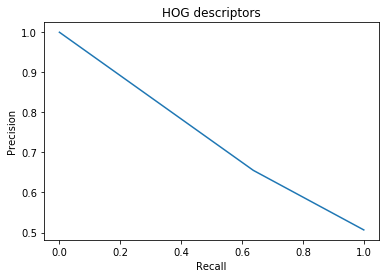

In [30]:
#precision_recalll_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
#y_score = model.decision_function(X_test)
y_score=model.predict_proba(X_test)[:,1]
#f1= f1_score(y_test, y_score)
precision, recall, _ = precision_recall_curve(y_test, y_score)
#print("f1 score",f1)
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("HOG descriptors")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('1_HOG_pr', dpi=100)

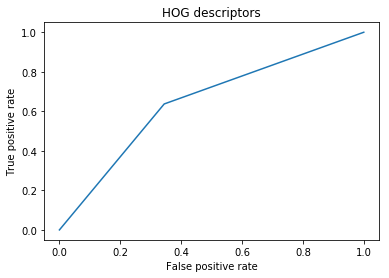

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds =roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("HOG descriptors")

fig2= plt.gcf()
plt.show()
plt.draw()
fig2.savefig('2_HOG_roc', dpi=100)

# HOG_HIST FEATURES

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_hog_hist_file,np.array(label),test_size=0.3,random_state=42)

In [34]:
len(X_train)

6194

In [35]:
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef
from sklearn.metrics import average_precision_score,f1_score
#model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
mcc=matthews_corrcoef(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Accuracy",accuracy)
print("Kappa",kappa)
print("MCC",mcc)
print("F1",f1)
#print(avg_precision)

Accuracy 0.740489642185
Kappa 0.481028243795
MCC 0.481127750388
F1 0.741269245212


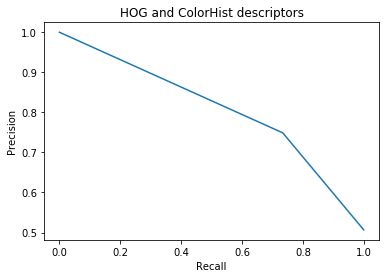

In [36]:
#precision_recalll_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
#y_score = model.decision_function(X_test)
y_score=model.predict_proba(X_test)[:,1]
#f1 = f1_score(y_test, y_score)
precision, recall, _ = precision_recall_curve(y_test, y_score)
#print("f1 score",f1)
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("HOG and ColorHist descriptors")

fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('3_HOG_Hist_pr',dpi=100)

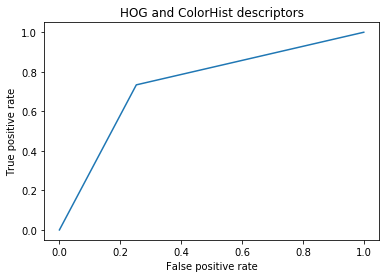

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds =roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("HOG and ColorHist descriptors")
fig4=plt.gcf()
plt.show()
plt.draw()
fig4.savefig('4_HOG_Hist_roc', dpi=100)

In [21]:
print(len(y_pred))

2655


In [22]:
print(len(y_test))

2655


In [23]:
# HOG+HIST+HU MOMENT FEATURES

In [59]:
################ Validation Curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#train_scores, valid_scores = validation_curve(GaussianNB(), X_train, y_train, (0.7,0.8) ,cv=5)
estimator = GaussianNB()
title = "Learning Curves (Naive Bayes)"
train_sizes, train_scores, valid_scores=learning_curve(estimator, X_train, y_train, train_sizes=[3500,3800,4000,4200,4500], cv=5)

In [60]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

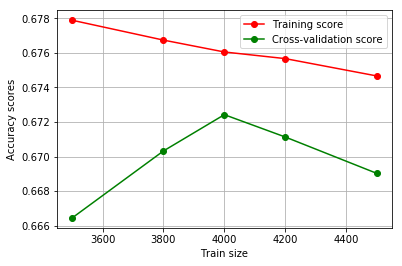

In [64]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.ylabel('Accuracy scores')
plt.xlabel('Train size')
plt.legend(loc="best")
plt.grid()
plt.show()